<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-set-information" data-toc-modified-id="Data-set-information-1">Data set information</a></span><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-1.1">Features</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2">Imports</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3">Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#remove-the-id-column" data-toc-modified-id="remove-the-id-column-3.0.1">remove the id column</a></span></li><li><span><a href="#clean-categorical-data" data-toc-modified-id="clean-categorical-data-3.0.2">clean categorical data</a></span><ul class="toc-item"><li><span><a href="#clean-tabs-and-spaces" data-toc-modified-id="clean-tabs-and-spaces-3.0.2.1">clean tabs and spaces</a></span></li><li><span><a href="#convert-classification-to-0-and-1" data-toc-modified-id="convert-classification-to-0-and-1-3.0.2.2">convert classification to 0 and 1</a></span></li></ul></li></ul></li><li><span><a href="#filling-missing-values" data-toc-modified-id="filling-missing-values-3.1">filling missing values</a></span></li><li><span><a href="#Distribution-of-features" data-toc-modified-id="Distribution-of-features-3.2">Distribution of features</a></span><ul class="toc-item"><li><span><a href="#numeric_columns-distribution" data-toc-modified-id="numeric_columns-distribution-3.2.1">numeric_columns distribution</a></span></li><li><span><a href="#categorical_columns-distribution" data-toc-modified-id="categorical_columns-distribution-3.2.2">categorical_columns distribution</a></span></li><li><span><a href="#categorical_columns-distribution-based-on-classification" data-toc-modified-id="categorical_columns-distribution-based-on-classification-3.2.3">categorical_columns distribution based on classification</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-3.3">Correlations</a></span></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-3.4">Encoding</a></span></li></ul></li><li><span><a href="#model-creation" data-toc-modified-id="model-creation-4">model creation</a></span><ul class="toc-item"><li><span><a href="#models-without-scaling" data-toc-modified-id="models-without-scaling-4.1">models without scaling</a></span></li><li><span><a href="#model-after-scaling" data-toc-modified-id="model-after-scaling-4.2">model after scaling</a></span></li><li><span><a href="#comparison-of-models-before-and-after-scaling" data-toc-modified-id="comparison-of-models-before-and-after-scaling-4.3">comparison of models before and after scaling</a></span></li><li><span><a href="#feature-importance" data-toc-modified-id="feature-importance-4.4">feature importance</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.4.1">LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-4.4.2">RandomForestClassifier</a></span></li><li><span><a href="#Lightgbm" data-toc-modified-id="Lightgbm-4.4.3">Lightgbm</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5">Conclusion</a></span></li></ul></div>

# Data set information
link: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

The data set was collected over two months of period.

<!-- |||
|:--|:--|
| age - age| bp - blood pressure|
|sg - specific gravity|al - albumin|
su - sugar | rbc - red blood cells
pc - pus cell | pcc - pus cell clumps
ba - bacteria | bgr - blood glucose random
bu - blood urea | sc - serum creatinine
sod - sodium | pot - potassium
hemo - hemoglobin | pcv - packed cell volume
wc - white blood cell count | rc - red blood cell count
htn - hypertension | dm - diabetes mellitus
cad - coronary artery disease | appet - appetite
pe - pedal edema | ane - anemia
class - class -->



## Features

Total 24 features are in the dataset out of which 11 are neumeric and 14 are categorical.

Numeric features:

| | |
|:-|:-|
Age | age in years
Blood Pressure | bp in mm/Hg
Blood Glucose Random | bgr in mgs/dl
Blood Urea | bu in mgs/dl
Serum Creatinine| sc in mgs/dl
Sodium | sod in mEq/L
Potassium | pot in mEq/L
Hemoglobin | hemo in gms
Packed Cell Volume
White Blood Cell Count | wc in cells/cumm
Red Blood Cell Count | rc in millions/cmm

<br>
Categorical features
    
| | |
|:-|:-|
Specific Gravity | sg - (1.005,1.010,1.015,1.020,1.025)
Albumin | al - (0,1,2,3,4,5)
Sugar | su - (0,1,2,3,4,5)
Red Blood Cells | rbc - (normal,abnormal)
Pus Cell  | pc - (normal,abnormal)
Pus Cell clumps | pcc - (present,notpresent)
Bacteria | ba - (present,notpresent)
Hypertension | htn - (yes,no)
Diabetes Mellitus | dm - (yes,no)
Coronary Artery Disease | cad - (yes,no)
Appetite | appet - (good,poor)
Pedal Edema | pe - (yes,no)
Anemia | ane - (yes,no)
Class  | class - (ckd,not ckd)



# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px

In [2]:
df = pd.read_csv("kidney_disease.csv")

# Preprocessing

In [3]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Rename the columns for better understanding

In [4]:
# rename columns
column_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=column_names, inplace=True)

In [5]:
df.head(3)

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

some features from numeric features are dtype 'object'.
Covert these to numeric.

In [7]:
df['red_blood_cell_count']=pd.to_numeric(df['red_blood_cell_count'],errors='coerce')
df['packed_cell_volume']=pd.to_numeric(df['packed_cell_volume'],errors='coerce')
df['white_blood_cell_count']=pd.to_numeric(df['white_blood_cell_count'],errors='coerce')
# error coerce means if the value is not numeric it will return NAN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

### remove the id column

In [9]:
df.drop(['id'],axis=1,inplace=True)

### clean categorical data

In [10]:
categorical_columns = [col for col in df.columns if df[col].dtype=='object']
categorical_columns

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'classification']

In [11]:
# check unique categorical values
for col in categorical_columns:
    print(col,":")
    print(df[col].unique(),"\n")

red_blood_cells :
[nan 'normal' 'abnormal'] 

pus_cell :
['normal' 'abnormal' nan] 

pus_cell_clumps :
['notpresent' 'present' nan] 

bacteria :
['notpresent' 'present' nan] 

hypertension :
['yes' 'no' nan] 

diabetes_mellitus :
['yes' 'no' ' yes' '\tno' '\tyes' nan] 

coronary_artery_disease :
['no' 'yes' '\tno' nan] 

appetite :
['good' 'poor' nan] 

pedal_edema :
['no' 'yes' nan] 

anemia :
['no' 'yes' nan] 

classification :
['ckd' 'ckd\t' 'notckd'] 



#### clean tabs and spaces

In [12]:
for col in categorical_columns:
#     print(col,":")
    df[col]=df[col].str.strip(' \t')

In [13]:
for col in categorical_columns:
    print(col,":")
    print(df[col].unique(),"\n")

red_blood_cells :
[nan 'normal' 'abnormal'] 

pus_cell :
['normal' 'abnormal' nan] 

pus_cell_clumps :
['notpresent' 'present' nan] 

bacteria :
['notpresent' 'present' nan] 

hypertension :
['yes' 'no' nan] 

diabetes_mellitus :
['yes' 'no' nan] 

coronary_artery_disease :
['no' 'yes' nan] 

appetite :
['good' 'poor' nan] 

pedal_edema :
['no' 'yes' nan] 

anemia :
['no' 'yes' nan] 

classification :
['ckd' 'notckd'] 



#### convert classification to 0 and 1

In [14]:
df["classification"]=np.where(df['classification']=='ckd',1,0)


In [15]:
df['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

## filling missing values

there are several ways missing values can be filled.
1. use mode for categorial values and mean for numerical values
2. use nearest neighbour to replace the nan values for categorical values.

In [16]:
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [17]:
df_org = df.copy()

In [18]:
categorical_columns = [col for col in df_org if df[col].dtype=='object']
print("categorical_columns : \n",categorical_columns,'\n')

numeric_columns = [col for col in df_org if df[col].dtype!='object']
print("numeric_columns: \n",numeric_columns)

categorical_columns : 
 ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia'] 

numeric_columns: 
 ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'classification']


In [19]:
def col_stat(feature,stat='mean'):
    col_data = df_org[df_org[feature].notnull()]
    if stat=='mean':
        value = col_data.groupby("classification")[col].mean()
    if stat=='median':
        value = col_data.groupby("classification")[col].median()
    if stat=='mode':
        value = col_data.groupby("classification")[col].agg(pd.Series.mode)
    return value

In [20]:
for col in numeric_columns[:-1]:
    print(col_stat(col,'mean'),"\n")

classification
0    46.516779
1    54.541322
Name: age, dtype: float64 

classification
0    71.351351
1    79.625000
Name: blood_pressure, dtype: float64 

classification
0    1.022414
1    1.013918
Name: specific_gravity, dtype: float64 

classification
0    0.000000
1    1.722488
Name: albumin, dtype: float64 

classification
0    0.00000
1    0.76699
Name: sugar, dtype: float64 

classification
0    107.722222
1    175.419811
Name: blood_glucose_random, dtype: float64 

classification
0    32.798611
1    72.389030
Name: blood_urea, dtype: float64 

classification
0    0.868966
1    4.414916
Name: serum_creatinine, dtype: float64 

classification
0    141.731034
1    133.901786
Name: sodium, dtype: float64 

classification
0    4.337931
1    4.878443
Name: potassium, dtype: float64 

classification
0    15.188194
1    10.647549
Name: haemoglobin, dtype: float64 

classification
0    46.335616
1    32.939891
Name: packed_cell_volume, dtype: float64 

classification
0    7705.594406
1

There is a differences in mean values for ckd and notckd. Hence I am going to fill the null values based on classification feature.


I am using mean for numeric values and mode for categorical values.

In [21]:
for col in numeric_columns[:-1]:
    mean = col_stat(col,stat='mean')
    df_org.loc[(df_org[col].isnull()) & (df_org['classification']== 0),col] = mean[0]
    df_org.loc[(df_org[col].isnull()) & (df_org['classification']== 1),col] = mean[1]
    

In [22]:
df_org[numeric_columns].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
classification            0
dtype: int64

In [23]:
categorical_columns

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia']

In [24]:
for col in categorical_columns:
    mode = col_stat(col,stat='mode')
    df_org.loc[(df_org[col].isnull()) & (df_org['classification']== 0),col] = mode[0]
    df_org.loc[(df_org[col].isnull()) & (df_org['classification']== 1),col] = mode[1]

In [25]:
df_org[categorical_columns].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
dtype: int64

## Distribution of features

### numeric_columns distribution

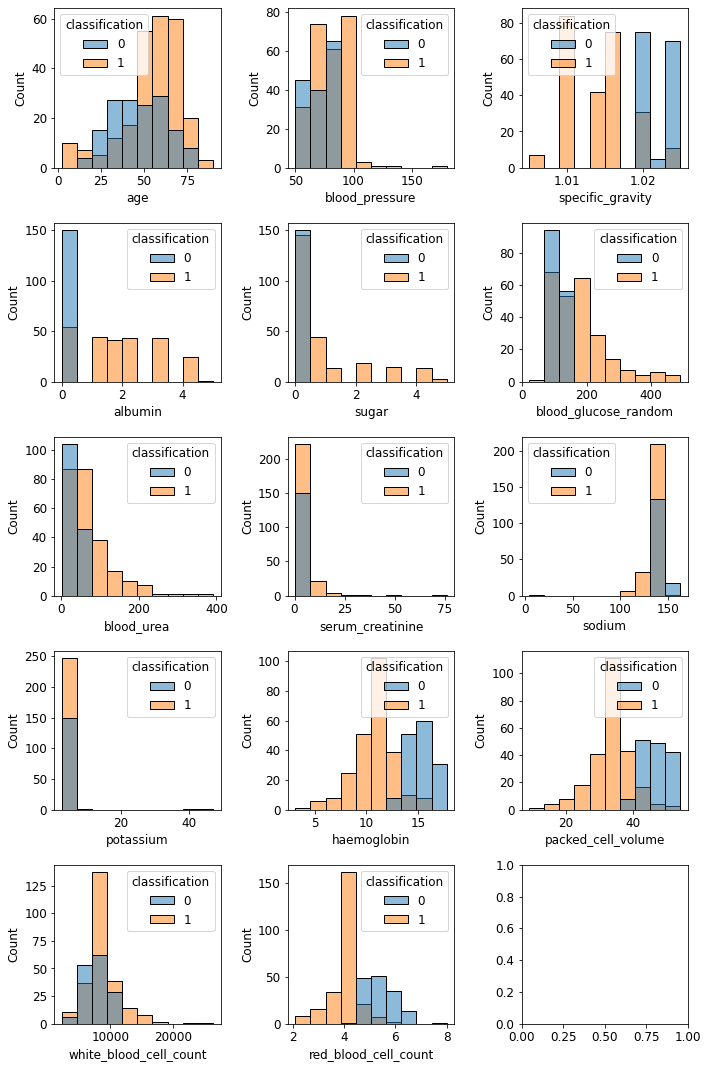

In [26]:

n_cols = 3
n_rows = len(numeric_columns)//n_cols 

plt.rc('font',size=12)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,
                         figsize = [10,15])

positions = list(np.ndindex(n_rows,n_cols))
for i,c in enumerate(numeric_columns[:-1]):
    sns.histplot(df_org[[c,'classification']],x=c,hue='classification',
                 ax = axes[positions[i]],bins=10)
plt.tight_layout()
# plt.savefig("images/numeric_distribution.png",facecolor='white', transparent=False,dpi=150)


### categorical_columns distribution

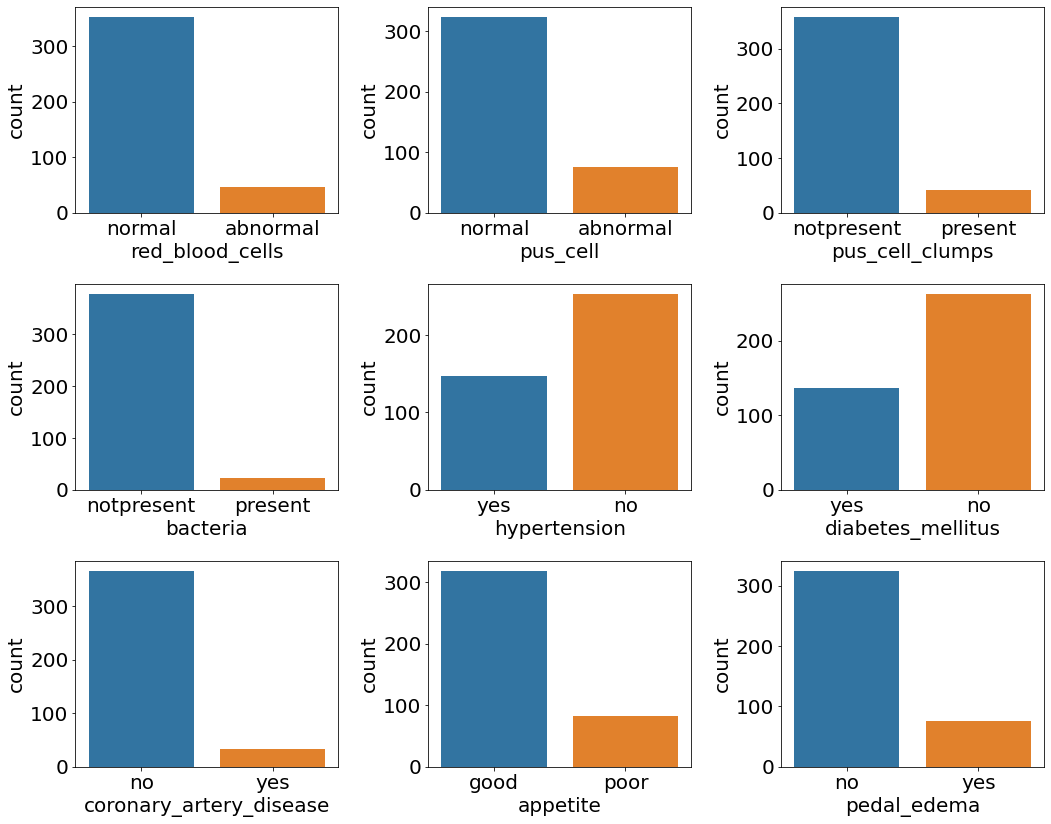

In [27]:
plt.rc('font',size=14)
n_rows = len(categorical_columns)
plt.rc('font',size = 20)
plt.figure(figsize=(15,15))
for i,c in enumerate(categorical_columns[:-1]):
    plt.subplot(int(n_rows/3)+1,3,i+1)
    sns.countplot(x=c,data=df_org)
    
plt.tight_layout()
# plt.savefig("images/categorical_columns.pngegorical_columns.png",facecolor='white', transparent=False,dpi=150)

### categorical_columns distribution based on classification 

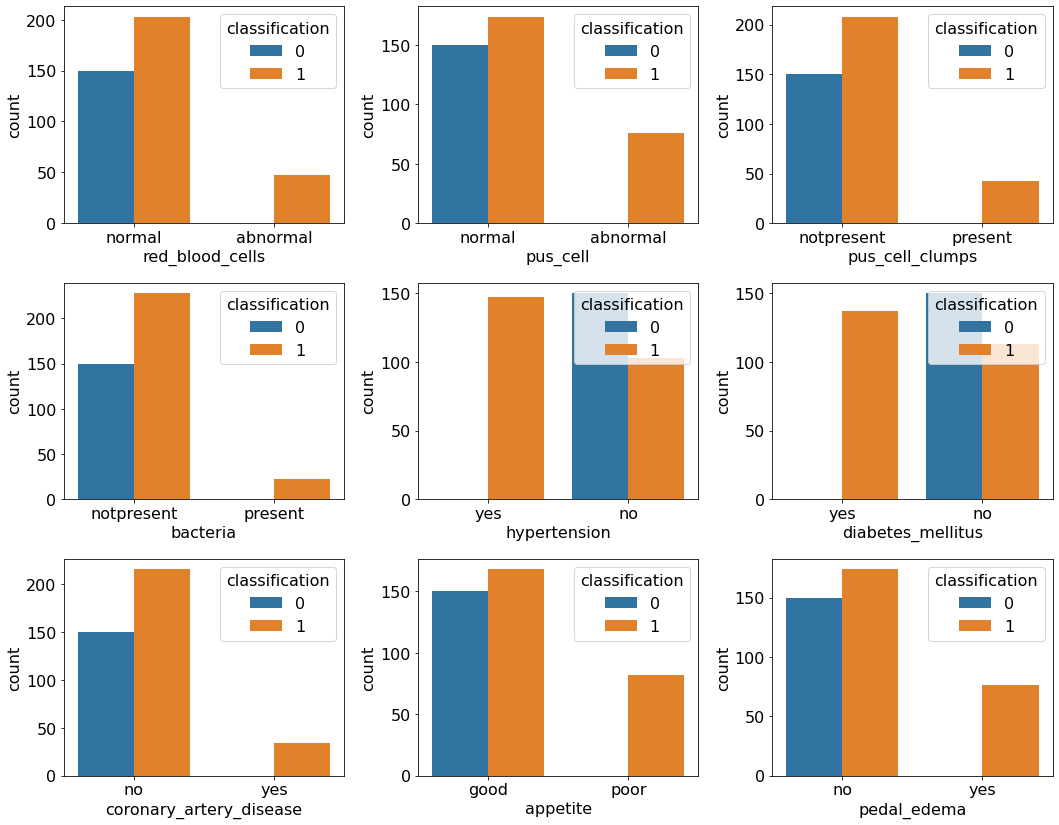

In [28]:
n_rows = len(categorical_columns)

plt.rc('font',size = 16)
plt.figure(figsize=(15,15))
for i,c in enumerate(categorical_columns[:-1]):
    plt.subplot(int(n_rows/3)+1,3,i+1)
    sns.countplot(x=c,data=df_org,hue='classification')

plt.tight_layout()
# plt.savefig("images/categorical_columns.pngegorical_columns_with_class.png",facecolor='white', transparent=False,dpi=150)

## Correlations

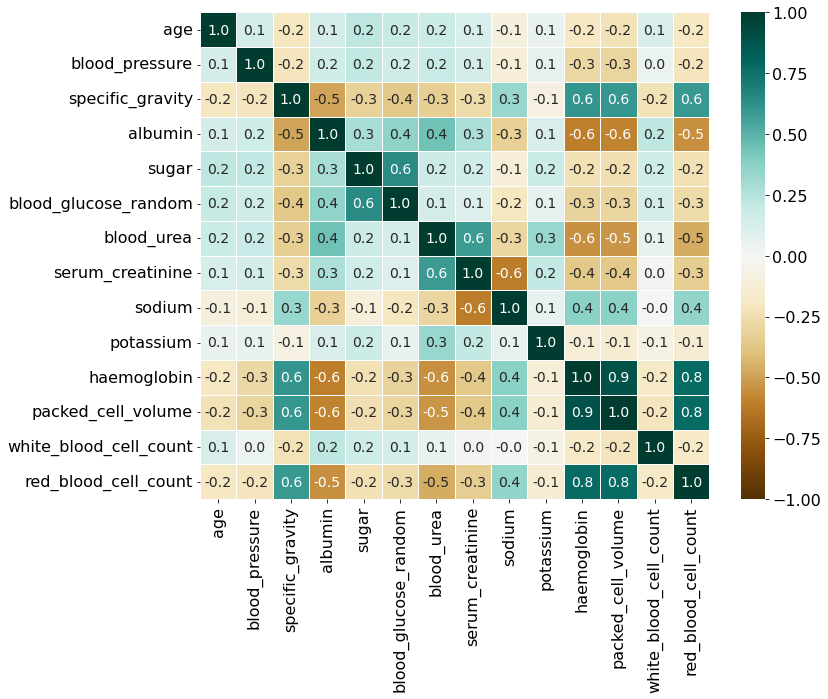

In [29]:
plt.rc('font',size=16)
plt.figure(figsize=[12,10])
sns.heatmap(df_org[numeric_columns[:-1]].corr(),
            annot=True,linewidths=0.5,cmap='BrBG',
            annot_kws={"fontsize":14},fmt='0.1f',vmin=-1,vmax=1)

plt.tight_layout()
# plt.savefig("images/corr1.png",facecolor='white', transparent=False,dpi=150)

Very strong correlations between 'Haemoglobin', 'packed_cell_volume', and 'red_blood_cell_count'. Lets check the Variance Inflation Factor (VIF).

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
df_n = df_org[numeric_columns[:-1]] # remove classification

In [32]:
def sklearn_vif(features,df):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    features (list): list of features/independent variables
    df (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous(features) variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''
    vif={}
    for f in features:
        x = df.drop(f,axis=1)
        y = df[f]
        model_i = LinearRegression().fit(x,y)
        r2 = model_i.score(x,y)
        vif[f]=1/(1-r2)
    return vif

In [33]:
pd.Series( sklearn_vif(df_n.columns,df_n)).sort_values(ascending=False)

haemoglobin               5.708914
packed_cell_volume        5.462380
red_blood_cell_count      2.964857
serum_creatinine          2.386813
blood_urea                2.207721
sodium                    1.971927
blood_glucose_random      1.923232
sugar                     1.888911
specific_gravity          1.875649
albumin                   1.842837
potassium                 1.236124
blood_pressure            1.138054
white_blood_cell_count    1.130427
age                       1.111609
dtype: float64

By default the threshold for VIF is considered as 5.
Let's remove 'packed_cell_volume'

In [34]:
df_n2 = df_n.drop('packed_cell_volume',axis=1)

In [35]:
pd.Series( sklearn_vif(df_n2.columns,df_n2)).sort_values(ascending=False)

haemoglobin               3.465580
red_blood_cell_count      2.784319
serum_creatinine          2.384181
blood_urea                2.191799
sodium                    1.961415
blood_glucose_random      1.922979
sugar                     1.887993
specific_gravity          1.869344
albumin                   1.838446
potassium                 1.233370
blood_pressure            1.125388
white_blood_cell_count    1.122434
age                       1.105879
dtype: float64

Now all the VIF values are less than 5

In [36]:
df_org_1 = df_org.drop('packed_cell_volume',axis=1)
df_org_1.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'white_blood_cell_count',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia',
       'classification'],
      dtype='object')

In [37]:
# numeric_columns.remove('packed_cell_volume')
numeric_columns_1 = numeric_columns.copy()
numeric_columns_1.remove('packed_cell_volume')

## Encoding 

In [38]:
for c in categorical_columns:
    print(f"{c} has unique values {df_org_1[c].nunique()}")

red_blood_cells has unique values 2
pus_cell has unique values 2
pus_cell_clumps has unique values 2
bacteria has unique values 2
hypertension has unique values 2
diabetes_mellitus has unique values 2
coronary_artery_disease has unique values 2
appetite has unique values 2
pedal_edema has unique values 2
anemia has unique values 2


All the categorical values have two values. Hence I can use labelencoder.

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le_dict = {}
for c in categorical_columns:
    enc = LabelEncoder()
    enc.fit(df_org_1[c])
    le_dict[c] = enc
    df_org_1[c] = enc.transform(df_org_1[c])

In [41]:
df_org_1.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.4,7800.0,5.200000,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,175.419811,...,11.3,6000.0,3.945238,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.6,7500.0,3.945238,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.2,6700.0,3.900000,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.6,7300.0,4.600000,0,0,0,0,0,0,1


# model creation

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

In [43]:
x = df_org_1.drop('classification',axis=1)
y = df_org_1['classification']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1234)

## models without scaling

In [44]:
models = []
random_state = 1234
models.append(('LR', LogisticRegression(random_state = random_state,solver='liblinear',max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = random_state)))
models.append(('RF', RandomForestClassifier(random_state = random_state)))
models.append(('SVM', SVC(gamma='auto', random_state = random_state)))
models.append(('XGB', GradientBoostingClassifier(random_state = random_state)))
models.append(("LightGBM", LGBMClassifier(random_state = random_state)))

models

[('LR',
  LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier(random_state=1234)),
 ('RF', RandomForestClassifier(random_state=1234)),
 ('SVM', SVC(gamma='auto', random_state=1234)),
 ('XGB', GradientBoostingClassifier(random_state=1234)),
 ('LightGBM', LGBMClassifier(random_state=1234))]

In [45]:
cross_validation_results = []
names   = []

training_score_list = []
testing_score_list  =[]

for name, model in models:
    print("name :",name)
    print("model :",model)        
    cv_results = cross_val_score(model, x_train, y_train, cv = 10, scoring= "accuracy")
    print(cv_results,"\n")
    cross_validation_results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(x_train,y_train)
    train_score = accuracy_score(y_train,model.predict(x_train))
    test_score  = accuracy_score(y_test,model.predict(x_test))
    print(f"Training accuracy score : {train_score}")
    print(f"test accuracy score :,{train_score}")
    training_score_list.append(train_score)
    testing_score_list.append(test_score)
#     training_score.append()

name : LR
model : LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')
[0.96428571 0.96428571 1.         1.         1.         0.96428571
 1.         1.         1.         1.        ] 

LR: 0.989286 (0.016366)
Training accuracy score : 0.9928571428571429
test accuracy score :,0.9928571428571429
name : KNN
model : KNeighborsClassifier()
[0.71428571 0.67857143 0.64285714 0.64285714 0.64285714 0.85714286
 0.67857143 0.78571429 0.67857143 0.75      ] 

KNN: 0.707143 (0.067386)
Training accuracy score : 0.8357142857142857
test accuracy score :,0.8357142857142857
name : CART
model : DecisionTreeClassifier(random_state=1234)
[0.96428571 0.96428571 1.         1.         1.         1.
 1.         1.         0.96428571 1.        ] 

CART: 0.989286 (0.016366)
Training accuracy score : 1.0
test accuracy score :,1.0
name : RF
model : RandomForestClassifier(random_state=1234)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

RF: 1.000000 (0.000000)
Training accuracy score : 1.0
test accuracy sco

In [46]:
results_df = pd.DataFrame({"train_scores":training_score_list,
                           
                           'validation_scores':np.array(
                               cross_validation_results).mean(axis=1),
                           "test_scores":testing_score_list,
                           'models':names
                          },)
results_df

,train_scores,validation_scores,test_scores,models
0,0.992857,0.989286,0.991667,LR
1,0.835714,0.707143,0.758333,KNN
2,1.000000,0.989286,1.000000,CART
3,1.000000,1.000000,1.000000,RF
4,1.000000,0.610714,0.658333,SVM
5,1.000000,0.989286,1.000000,XGB
6,1.000000,0.996429,0.991667,LightGBM


In [47]:
results_df_melt = results_df.melt(id_vars='models')
results_df_melt

,models,variable,value
0,LR,train_scores,0.992857
1,KNN,train_scores,0.835714
2,CART,train_scores,1.000000
3,RF,train_scores,1.000000
4,SVM,train_scores,1.000000
5,XGB,train_scores,1.000000
6,LightGBM,train_scores,1.000000
7,LR,validation_scores,0.989286
8,KNN,validation_scores,0.707143
9,CART,validation_scores,0.989286


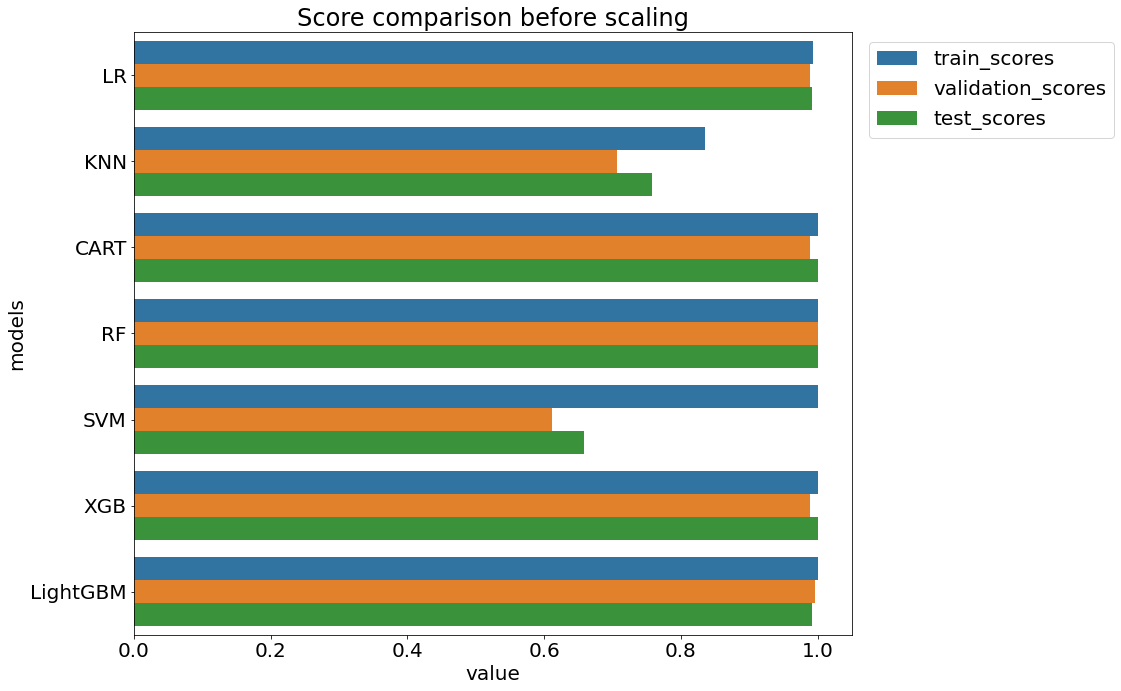

In [48]:
plt.rc('font',size=20)
plt.figure(figsize=[16,10])
plt.title( "Score comparison before scaling")
sns.barplot(data=results_df_melt,y='models',x='value',hue='variable')
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')

plt.tight_layout()
# plt.savefig("images/model_score_without_scaling.png",facecolor='white', transparent=False,dpi=150)

## model after scaling

In [49]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [50]:
numeric_data = df_org_1[numeric_columns_1[:-1]]
numeric_data

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,133.901786,4.878443,15.4,7800.0,5.200000
1,7.0,50.0,1.020,4.0,0.0,175.419811,18.0,0.8,133.901786,4.878443,11.3,6000.0,3.945238
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,133.901786,4.878443,9.6,7500.0,3.945238
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,6700.0,3.900000
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,133.901786,4.878443,11.6,7300.0,4.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,6700.0,4.900000
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,7800.0,6.200000
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,6600.0,5.400000
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,7200.0,5.900000


In [51]:
scaled_features = scaler.fit_transform(numeric_data)
scaled_features

array([[-0.29733283,  0.01875   ,  0.82213439, ...,  0.79471137,
        -0.52352017,  0.87666034],
       [-2.1609692 , -2.98125   ,  0.82213439, ..., -0.1926573 ,
        -1.26578822, -0.12333966],
       [ 0.3390308 ,  0.01875   , -0.82213439, ..., -0.60205407,
        -0.64723151, -0.12333966],
       ...,
       [-1.93369647,  0.01875   ,  0.82213439, ...,  0.89104002,
        -1.01836554,  1.03605313],
       [-1.70642374, -1.98125   ,  1.64426877, ...,  0.50572542,
        -0.77094286,  1.4345351 ],
       [ 0.15721262,  0.01875   ,  1.64426877, ...,  0.89104002,
        -0.93589131,  1.59392789]])

In [52]:
df_org_1[numeric_data.columns] = scaled_features

In [53]:
df_org_1.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,-0.297333,0.01875,0.822134,0.5,0.000000,1,1,0,0,-0.040312,...,0.794711,-0.523520,0.876660,1,1,0,0,0,0,1
1,-2.160969,-2.98125,0.822134,2.0,0.000000,1,1,0,0,0.690943,...,-0.192657,-1.265788,-0.123340,0,0,0,0,0,0,1
2,0.339031,0.01875,-0.822134,1.0,3.911392,1,1,0,0,4.017747,...,-0.602054,-0.647232,-0.123340,0,1,0,1,0,1,1
3,-0.297333,-0.98125,-1.644269,2.0,0.000000,1,0,1,0,-0.094061,...,-0.216739,-0.977128,-0.159393,1,0,0,1,1,1,1
4,-0.160969,0.01875,-0.822134,1.0,0.000000,1,1,0,0,-0.241871,...,-0.120411,-0.729706,0.398482,0,0,0,0,0,0,1


In [54]:
xs = df_org_1.drop('classification',axis=1)
ys = df_org_1['classification']

xs_train,xs_test,ys_train,ys_test = train_test_split(xs,ys,test_size=0.2,random_state=1234)

In [55]:
models_s = []
random_state = 1234
models_s.append(('LR', LogisticRegression(random_state = random_state,solver='liblinear',max_iter=1000)))
models_s.append(('KNN', KNeighborsClassifier()))
models_s.append(('CART', DecisionTreeClassifier(random_state = random_state)))
models_s.append(('RF', RandomForestClassifier(random_state = random_state)))
models_s.append(('SVM', SVC(gamma='auto', random_state = random_state)))
models_s.append(('XGB', GradientBoostingClassifier(random_state = random_state)))
models_s.append(("LightGBM", LGBMClassifier(random_state = random_state)))

models_s

[('LR',
  LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier(random_state=1234)),
 ('RF', RandomForestClassifier(random_state=1234)),
 ('SVM', SVC(gamma='auto', random_state=1234)),
 ('XGB', GradientBoostingClassifier(random_state=1234)),
 ('LightGBM', LGBMClassifier(random_state=1234))]

In [56]:
cross_validation_results_s = []
names_s   = []


training_score_list_s = []
testing_score_list_s  =[]

for name, model in models_s:
    print("name :",name)
    print("model :",model)        
    cv_results = cross_val_score(model, xs_train, ys_train, 
                                 cv = 10, scoring= "accuracy")
    print(cv_results,"\n")
    cross_validation_results_s.append(cv_results)
    names_s.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(xs_train,ys_train)
    train_score_s = accuracy_score(ys_train,model.predict(xs_train))
    test_score_s  = accuracy_score(ys_test,model.predict(xs_test))
    print(f"Training accuracy score : {train_score_s}")
    print(f"test accuracy score :,{train_score_s}")
    training_score_list_s.append(train_score_s)
    testing_score_list_s.append(test_score_s)

name : LR
model : LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')
[1.      0.96875 1.      1.      1.      1.      1.      1.      1.
 1.     ] 

LR: 0.996875 (0.009375)
Training accuracy score : 1.0
test accuracy score :,1.0
name : KNN
model : KNeighborsClassifier()
[0.96875 0.96875 0.9375  0.96875 0.96875 0.9375  0.9375  1.      0.9375
 1.     ] 

KNN: 0.962500 (0.023385)
Training accuracy score : 0.965625
test accuracy score :,0.965625
name : CART
model : DecisionTreeClassifier(random_state=1234)
[1.      1.      0.96875 1.      1.      1.      1.      1.      1.
 1.     ] 

CART: 0.996875 (0.009375)
Training accuracy score : 1.0
test accuracy score :,1.0
name : RF
model : RandomForestClassifier(random_state=1234)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

RF: 1.000000 (0.000000)
Training accuracy score : 1.0
test accuracy score :,1.0
name : SVM
model : SVC(gamma='auto', random_state=1234)
[1.      0.96875 1.      1.      1.      0.96875 0.96875 1.      1.
 1.     ] 

In [57]:
results_df_s = pd.DataFrame({"train_scores":training_score_list_s,
                           
                           'validation_scores':np.array(
                               cross_validation_results_s).mean(axis=1),
                           "test_scores":testing_score_list_s,
                           'models':names_s
                          },)
results_df_s

,train_scores,validation_scores,test_scores,models
0,1.000000,0.996875,1.000,LR
1,0.965625,0.962500,0.975,KNN
2,1.000000,0.996875,0.975,CART
3,1.000000,1.000000,1.000,RF
4,1.000000,0.990625,1.000,SVM
5,1.000000,0.990625,0.975,XGB
6,1.000000,0.990625,1.000,LightGBM


In [58]:
results_df_melt_s = results_df_s.melt(id_vars='models')
results_df_melt_s

,models,variable,value
0,LR,train_scores,1.000000
1,KNN,train_scores,0.965625
2,CART,train_scores,1.000000
3,RF,train_scores,1.000000
4,SVM,train_scores,1.000000
5,XGB,train_scores,1.000000
6,LightGBM,train_scores,1.000000
7,LR,validation_scores,0.996875
8,KNN,validation_scores,0.962500
9,CART,validation_scores,0.996875


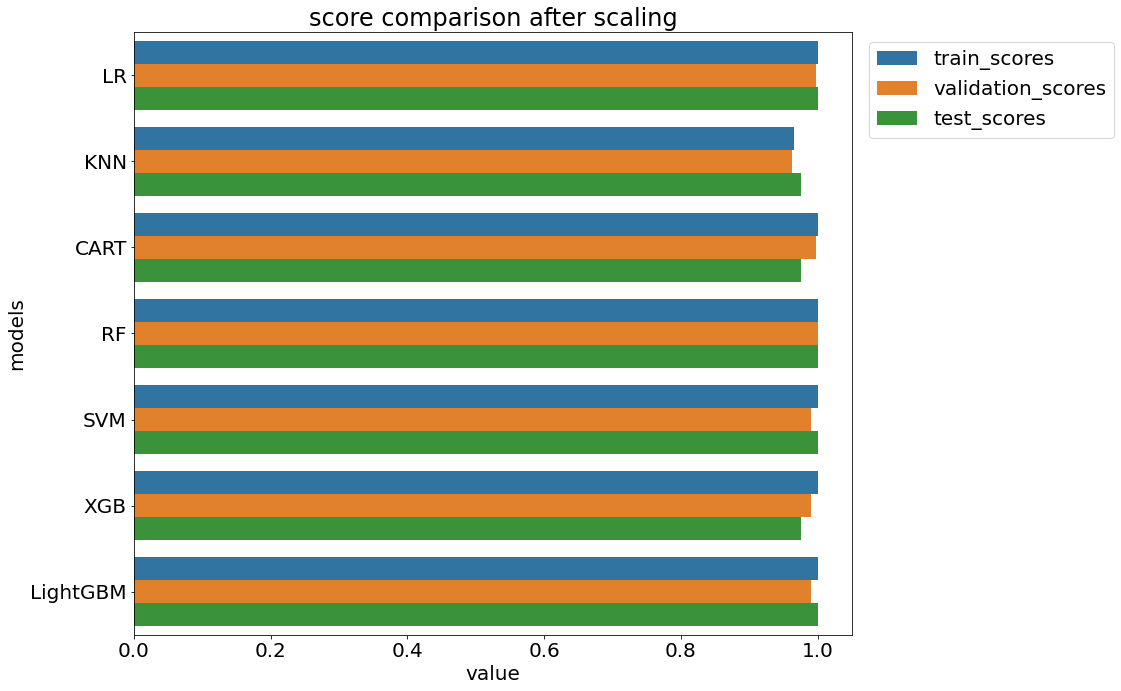

In [59]:
plt.rc('font',size=20)

plt.figure(figsize=[16,10])
plt.title( "score comparison after scaling")
sns.barplot(data=results_df_melt_s,y='models',x='value',hue='variable')
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')

plt.tight_layout()
# plt.savefig("images/model_score_after_scaling.png",facecolor='white', 
#             transparent=False,dpi=150)

## comparison of models before and after scaling

In [60]:
before_scaling_test =results_df.copy()[['test_scores','models']]
before_scaling_test['scaled']='No'
before_scaling_test

,test_scores,models,scaled
0,0.991667,LR,No
1,0.758333,KNN,No
2,1.000000,CART,No
3,1.000000,RF,No
4,0.658333,SVM,No
5,1.000000,XGB,No
6,0.991667,LightGBM,No


In [61]:
after_scaling_test =results_df_s.copy()[['test_scores','models']]
after_scaling_test['scaled']='Yes'
after_scaling_test

,test_scores,models,scaled
0,1.000,LR,Yes
1,0.975,KNN,Yes
2,0.975,CART,Yes
3,1.000,RF,Yes
4,1.000,SVM,Yes
5,0.975,XGB,Yes
6,1.000,LightGBM,Yes


In [62]:
combined_results = pd.concat([before_scaling_test,after_scaling_test])
combined_results

,test_scores,models,scaled
0,0.991667,LR,No
1,0.758333,KNN,No
2,1.000000,CART,No
3,1.000000,RF,No
4,0.658333,SVM,No
5,1.000000,XGB,No
6,0.991667,LightGBM,No
0,1.000000,LR,Yes
1,0.975000,KNN,Yes
2,0.975000,CART,Yes


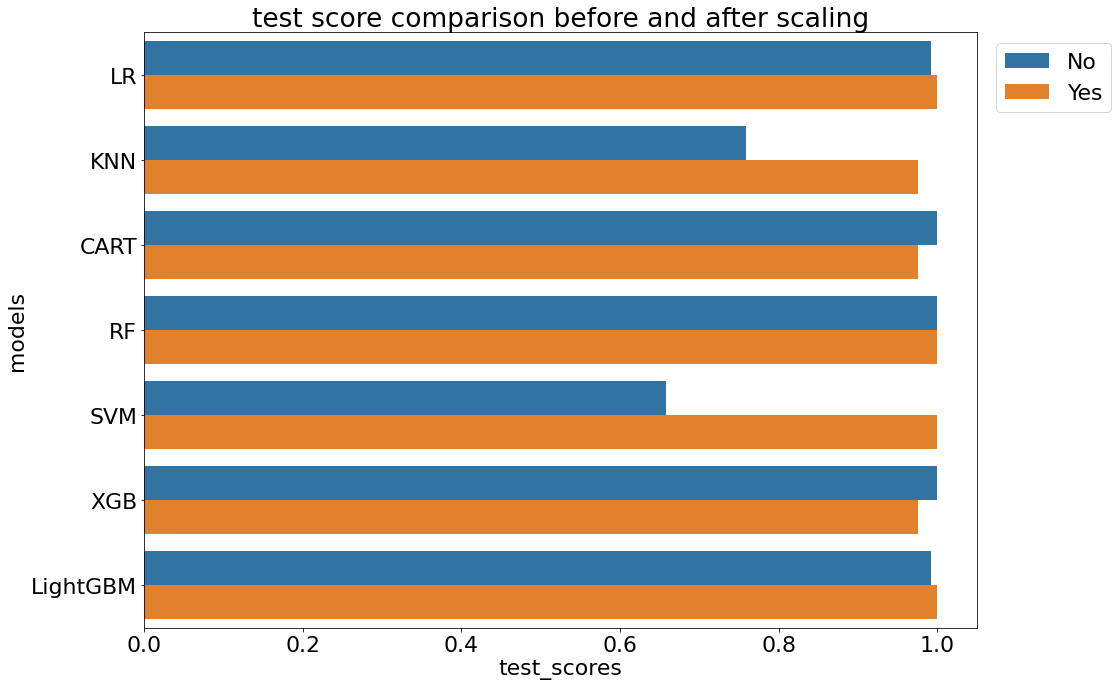

In [63]:
plt.rc('font',size=22)

plt.figure(figsize=[16,10])
plt.title( "test score comparison before and after scaling")
sns.barplot(data=combined_results,y='models',x='test_scores',hue='scaled')
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')

plt.tight_layout()
# plt.savefig("images/model_comparison_before_and_after_scaling.png",facecolor='white', 
#             transparent=False,dpi=150)

From the above comparison it is clear that the performance KNN and SVM improved a lot after scaling data.

## feature importance

In [64]:
models_s

[('LR',
  LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier(random_state=1234)),
 ('RF', RandomForestClassifier(random_state=1234)),
 ('SVM', SVC(gamma='auto', random_state=1234)),
 ('XGB', GradientBoostingClassifier(random_state=1234)),
 ('LightGBM', LGBMClassifier(random_state=1234))]

### LogisticRegression

In [65]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = xs.columns
feature_importance_df['importance'] = np.abs(models_s[0][1].coef_[0])
feature_importance_df.sort_values('importance',ascending=False,inplace=True)


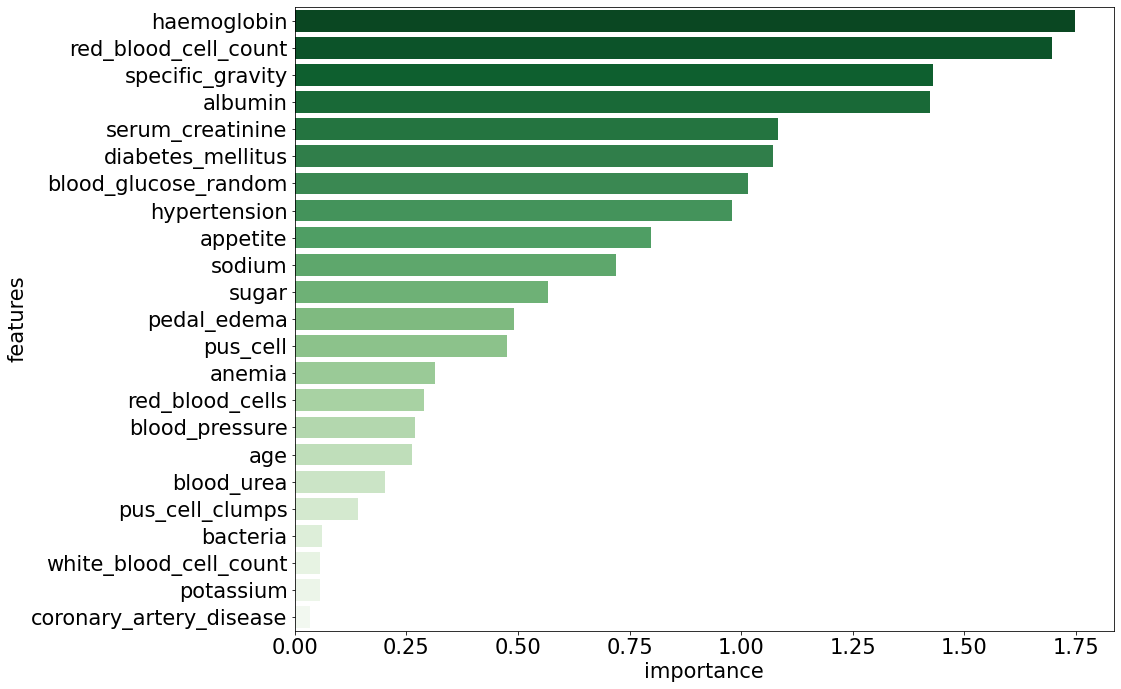

In [66]:
plt.rc('font',size=21)
plt.figure(figsize=[16,10])
sns.barplot(x='importance',
            y='features',
            data=feature_importance_df,palette='Greens_r')
plt.tight_layout()
# plt.savefig("images/logistic_regression_imp.png",facecolor='white', 
#             transparent=False,dpi=150)

### RandomForestClassifier

In [67]:
print(models_s[3][1])
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = xs.columns
feature_importance_df['importance'] = np.abs(models_s[3][1].feature_importances_)
feature_importance_df.sort_values('importance',ascending=False,inplace=True)
feature_importance_df.head()

RandomForestClassifier(random_state=1234)


,features,importance
14,haemoglobin,0.237692
16,red_blood_cell_count,0.210717
2,specific_gravity,0.135225
11,serum_creatinine,0.100131
3,albumin,0.080189


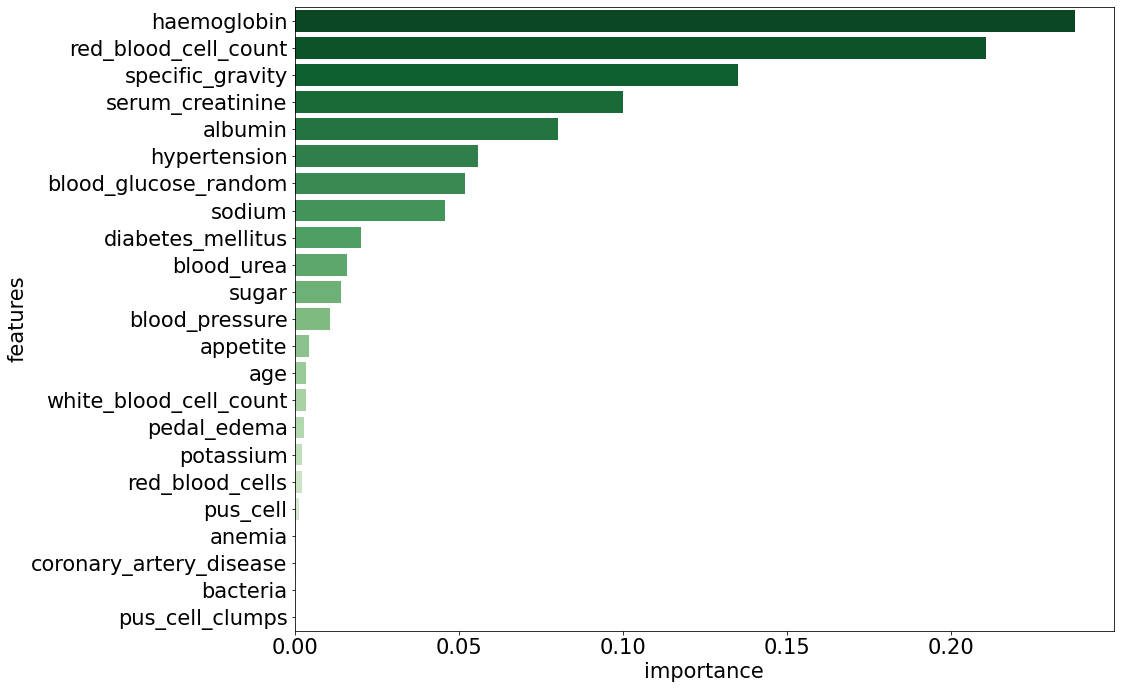

In [68]:
plt.rc('font',size=21)
plt.figure(figsize=[16,10])
sns.barplot(x='importance',
            y='features',
            data=feature_importance_df,palette='Greens_r')
plt.tight_layout()
# plt.savefig("images/Randomforest_imp.png",facecolor='white', 
#             transparent=False,dpi=150)

### Lightgbm

In [69]:
print(models_s[6][1])
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = xs.columns
feature_importance_df['importance'] = np.abs(models_s[6][1].feature_importances_)
feature_importance_df.sort_values('importance',ascending=False,inplace=True)
feature_importance_df.head()

LGBMClassifier(random_state=1234)


,features,importance
14,haemoglobin,312
16,red_blood_cell_count,203
9,blood_glucose_random,153
11,serum_creatinine,150
3,albumin,133


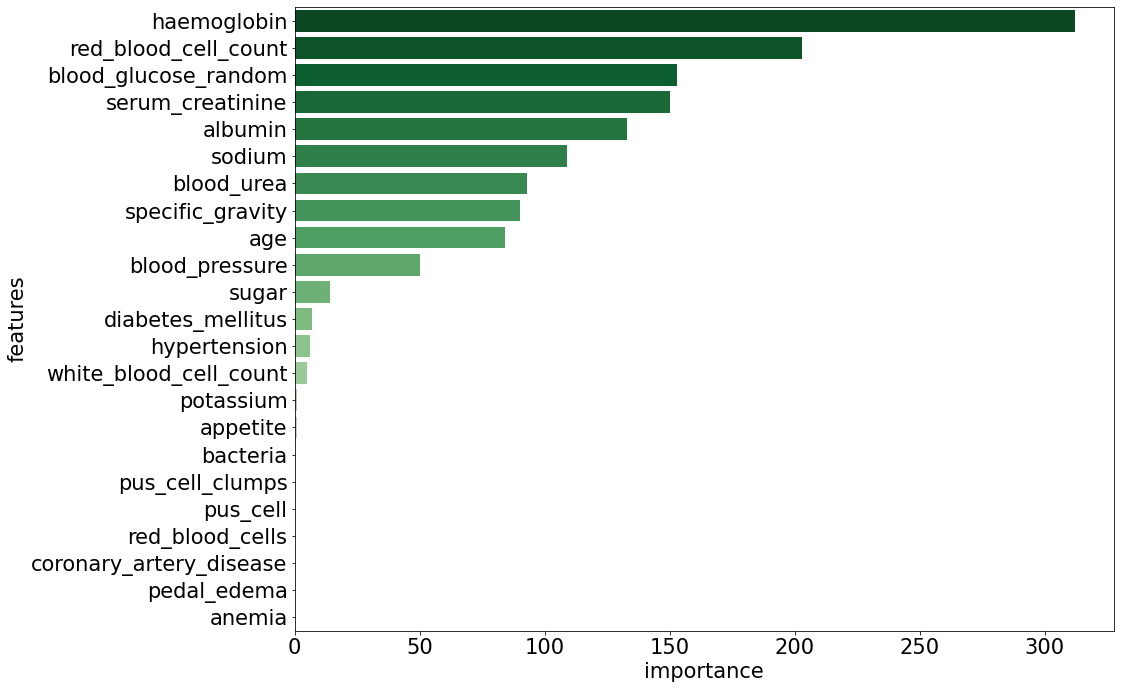

In [70]:
plt.rc('font',size=21)
plt.figure(figsize=[16,10])
sns.barplot(x='importance',
            y='features',
            data=feature_importance_df,palette='Greens_r')
plt.tight_layout()
# plt.savefig("images/Lightgbm_imp.png",facecolor='white', 
#             transparent=False,dpi=150)

# Conclusion

- I cleaned the data for categorical features. 
- Filled the missing values based on categorical stats.
- Calculated cross validation of 7 machine learning models and compared the validation score with test score.
- Scaling the data improved the performance of KNN and SVM.

Almost all the models give priority to the following features.

`haemoglobin, red_blood_cell_count, serum_creatinine, blood_glucose_random, specific_gravity, and albumin
